In [27]:
import numpy as np 
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
%matplotlib inline
df_sms = pd.read_csv(r'C:\Users\shivani\Downloads\spam_dataset.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [28]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"Email"})
df_sms.head()

,label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df_sms.label.value_counts()

ham     80
spam    19
Name: label, dtype: int64

In [7]:
df_sms.describe()

,label,Email
count,99,99
unique,2,99
top,ham,For real when u getting on yo? I only need 2 m...
freq,80,1


In [8]:
df_sms['length'] = df_sms['Email'].apply(len)
df_sms.head()

,label,Email,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
count1 = Counter(" ".join(df_sms[df_sms['label']=='ham']["Email"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in ham", 1 : "count"})
count2 = Counter(" ".join(df_sms[df_sms['label']=='spam']["Email"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

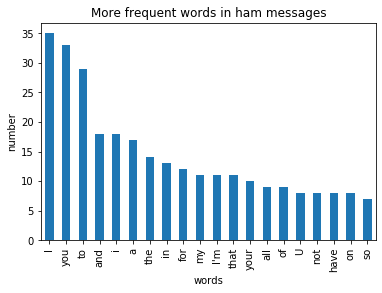

In [10]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in ham"]))
plt.xticks(y_pos, df1["words in ham"])
plt.title('More frequent words in ham messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

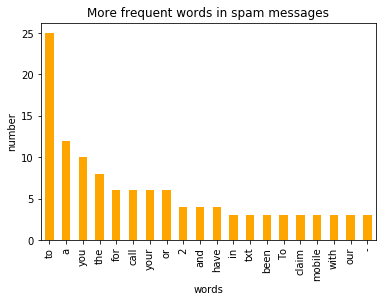

In [11]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

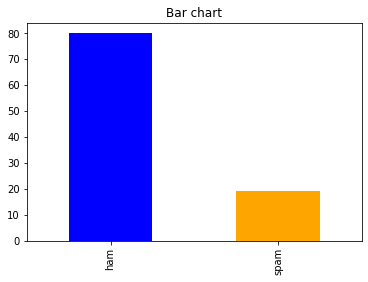

In [12]:
df_sms=pd.value_counts(df_sms["label"], sort= True)
df_sms.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [13]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [14]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [15]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [16]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [18]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [19]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['Email'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df_sms, df_labels, test_size=0.33, random_state=42)

KeyError: 'v1'

In [26]:
count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

NameError: name 'X_train' is not defined

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions = naive_bayes.predict(testing_data)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions,pos_label='spam')))
print('Recall score: {}'.format(recall_score(y_test, predictions,pos_label='spam')))
print('F1 score: {}'.format(f1_score(y_test, predictions,pos_label='spam')))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


In [26]:
spam_messages = df_sms[df_sms["label"] == "spam"]["Email"]
ham_messages = df_sms[df_sms["label"] == "ham"]["Email"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 
# This will also remove the not word in something like can't etc. 
# In a sentiment analysis setting, its better to use 
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: Email, Length: 4825, dtype: object

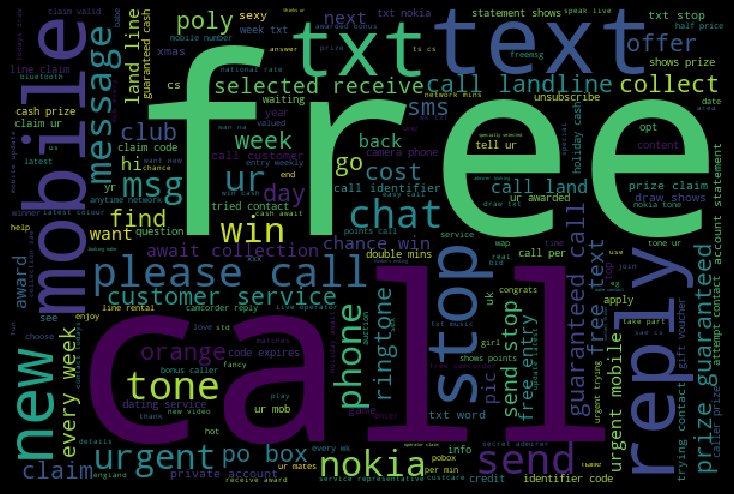

In [27]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

training_data = vect.fit_transform(X_train)

#transforming the test data into the count matrix initiated for train data
testing_data = vect.transform(X_test)

#fitting the model into train data 
naive_bayes.fit(training_data,y_train)

#predicting the model on train and test data
y_pred_test = naive_bayes.predict(testing_data)
y_pred_train = naive_bayes.predict(training_data)

#checking accuracy score
from sklearn.metrics import accuracy_score
print("The accuracy of the model is {}%".format(accuracy_score(y_test,y_pred_test)*100 ))


The accuracy of the model is 98.02690582959642%


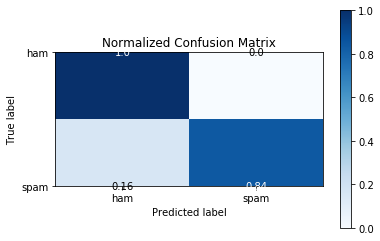

In [31]:
from sklearn.metrics import confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test, normalize=True)
plt.show()

In [32]:
new_text = pd.Series('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. valid 12 hours')
new_text_transform = vect.transform(new_text)
print(" The email is a" ,naive_bayes.predict(new_text_transform))

 The email is a ['spam']


In [33]:
new_text = pd.Series(" Hello, how are you?")
new_text_transform = vect.transform(new_text)
print(" The email is a" ,naive_bayes.predict(new_text_transform))

 The email is a ['ham']
